In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.Crea almenys una visualització per:

In [3]:
df= pd.read_csv ("C:\\Users\\client277192\Documents\\01-IT ACADEMY. DATA SCIENCE\\MATPLOTLIB\\TAREA 4\\preu lloguer per trimestre i barri.csv")
df.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [20]:
from matplotlib.pyplot import figure

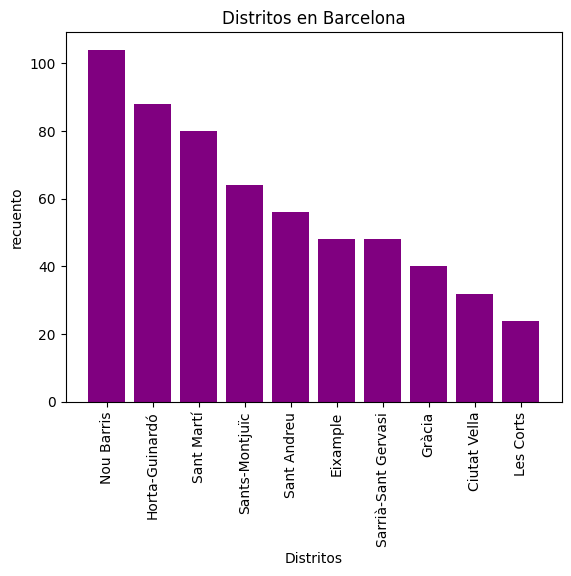

In [87]:
#Una variable categòrica (Districte o Barri)
#contando las veces que aparece el nombre del distrito sabemos cuantos barrios tiene cada distrito

cuenta=df["Nom_Districte"].value_counts()       #cuento las veces que aparece cada distrito. Será la altura de las barras
distrito =cuenta.index
recuento=cuenta.values
plt.bar(distrito, recuento, color='purple')
plt.xticks(rotation=90)
plt.xlabel("Distritos")
plt.ylabel("recuento")
plt.title("Distritos en Barcelona")
plt.savefig('Graf1.png')
plt.show()



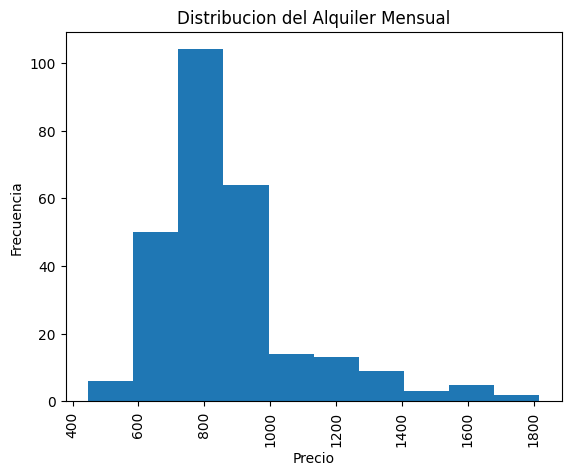

In [103]:
#visualització de una variable numerica (Preu) por el lloguer mitjà mensual

df_lloguer_mensual =df[df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)'] #el precio que se da es por una parte el mensual y por otra por m2. Aquí escojo el alquiler mensual
plt.hist(df_lloguer_mensual['Preu'], bins=10)
plt.xticks(rotation=90)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title ("Distribucion del Alquiler Mensual")
plt.savefig('Graf2.png')
plt.show()


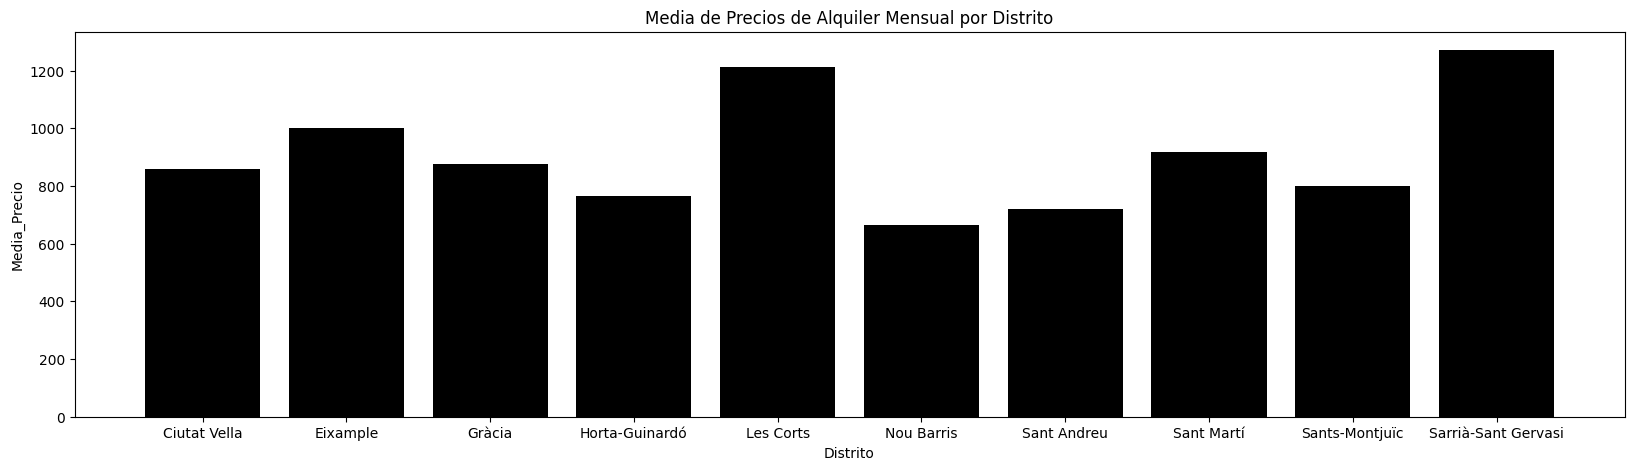

In [105]:
#Visualización de una variable numèrica i una categòrica (Districte i Preu)

df["Preu"]=pd.to_numeric(df["Preu"], errors="coerce")            #habian elementos no numericos en la columna preu. Así se convierten en numericos.
df_lloguer_mensual =df[df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']
precio_medio_distrito = df_lloguer_mensual.groupby('Nom_Districte')['Preu'].mean()
plt.figure(figsize=(20,5))                                         #defino el lienzo y es lo primero a hacer
plt.bar(precio_medio_distrito.index,precio_medio_distrito, color='black' )    #el index me está cogiento las etiquetas del eje de las x, el resto son los valores, en este caso el precio medio
plt.xlabel("Distrito")
plt.ylabel("Media_Precio")
plt.title ("Media de Precios de Alquiler Mensual por Distrito")
plt.savefig('Graf3.png')
plt.show()




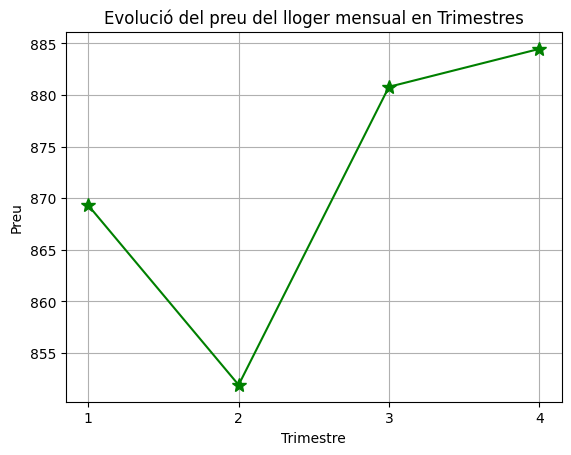

In [106]:
#Visualización de dos variables numericas (Any o Trimestre i Preu)

df["Preu"]=pd.to_numeric(df["Preu"], errors="coerce")            #habian elementos no numericos en la columna preu. Así se convierten en numericos.
df["Trimestre"]=pd.to_numeric(df["Trimestre"], errors="coerce") 

df_lloguer_mensual =df[df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']  
precio_medio_Trim =df_lloguer_mensual.groupby('Trimestre')['Preu'].mean()
plt.plot(precio_medio_Trim.index,precio_medio_Trim, marker='*',ms=10, color='green' ) 

plt.xticks(precio_medio_Trim.index)                             #para poner como valores de x los datos del Trimestre, es decir, 1, 2, 3, 4
plt.xlabel("Trimestre")
plt.ylabel("Preu")
plt.title ("Evolució del preu del lloger mensual en Trimestres")
plt.grid(True)
plt.savefig('Graf4.png')
plt.show()


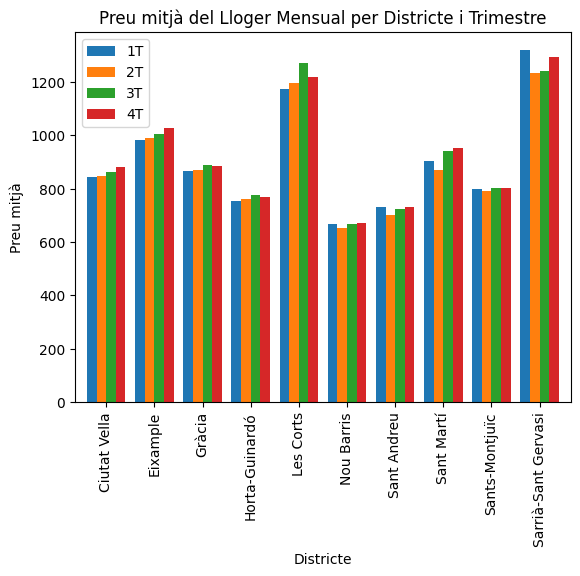

In [108]:
#mostrar tres variables(Barri o Districte, Trimestre i Preu)

df_lloguer_mensual =df[df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']  
datos_agrupados = df_lloguer_mensual.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().unstack()
grafico=datos_agrupados.plot(kind='bar', width=0.8)
plt.xlabel("Districte")
plt.ylabel("Preu mitjà")
plt.title ("Preu mitjà del Lloger Mensual per Districte i Trimestre")
nombre_trimestres=['1T', '2T','3T','4T']                            #Personalizo las descripciones de los trimestres
plt.legend(nombre_trimestres)
plt.savefig('Graf5.png')
plt.show()



In [99]:
#EXERCICI 2
#Exporta els gràfics com imatges o com HTML.
#S'ha exportat en cada gràfic

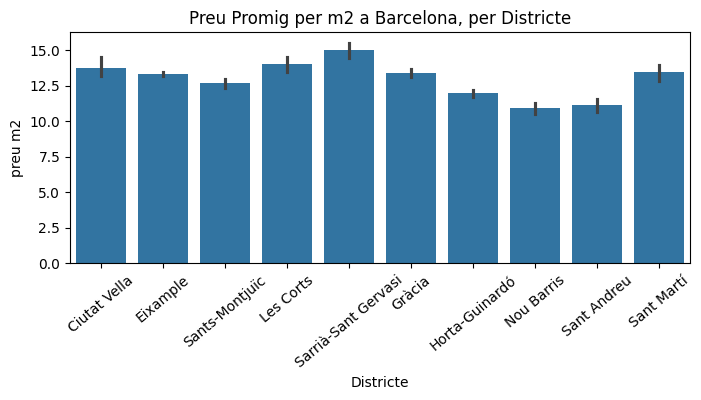

In [127]:
#EXERCICI 3
#Proposa alguna visualització que creguis que pot resultar interessant.

#preu del lloguer mitjà per superficie per Districte

plt.figure(figsize=(8,3))
df_lloguer_superficie =df[df['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']  
sns.barplot(x='Nom_Districte', y='Preu', data=df_lloguer_superficie)
plt.xticks(rotation=40)
plt.xlabel ('Districte')
plt.ylabel ('preu m2')
plt.title ('Preu Promig per m2 a Barcelona, per Districte')
plt.show()

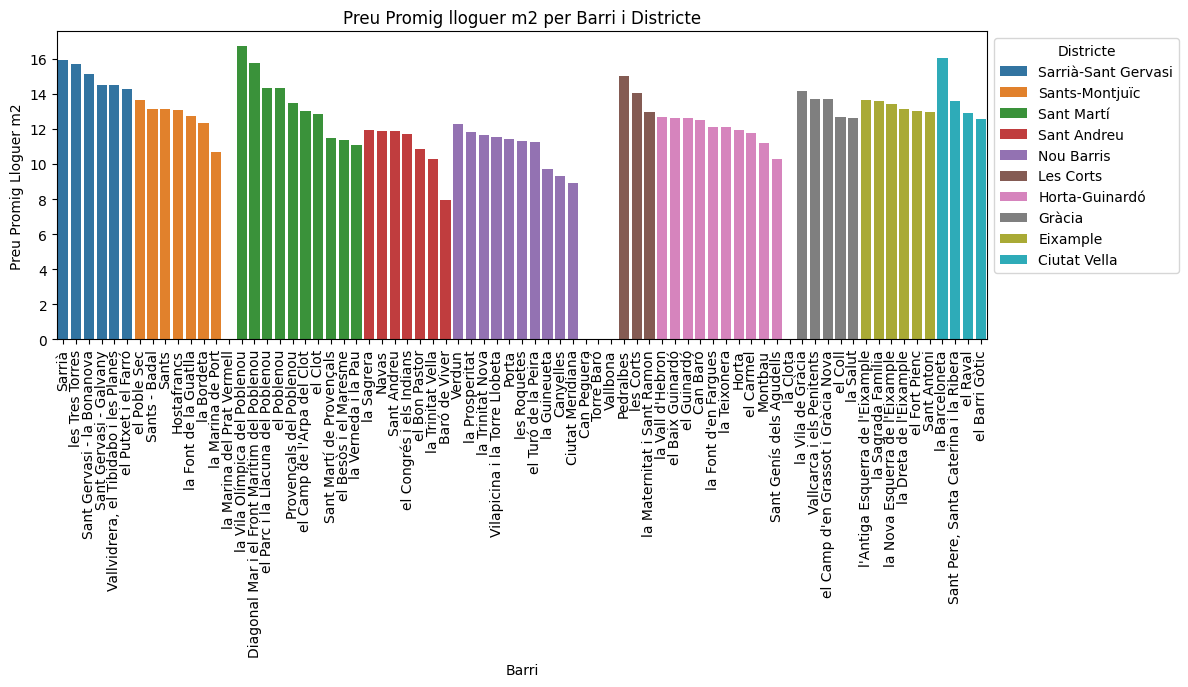

In [146]:
#Preu per m2 del lloger, per barris segons el districte.

plt.figure(figsize=(12,4))
df_lloguer_mensual =df[df['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']
precio_medio_distrito = df_lloguer_mensual.groupby(['Nom_Districte','Nom_Barri'])['Preu'].mean(). reset_index()
precio_medio_distrito=precio_medio_distrito.sort_values(by=['Nom_Districte','Preu'], ascending=[False, False])
ax=sns.barplot(x='Nom_Barri', y='Preu', hue='Nom_Districte', data=precio_medio_distrito)
plt.xticks(rotation=90)
plt.xlabel('Barri')
plt.ylabel('Preu Promig Lloguer m2')
plt.title('Preu Promig lloguer m2 per Barri i Districte')
ax.legend(title='Districte', bbox_to_anchor=(1,1), loc='upper left')

plt.show()